In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
!pip install -q kaggle


In [19]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sujayvichare","key":"f3955348e0540479016f91f451c79c6c"}'}

In [20]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [22]:
! kaggle datasets list


ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          27348        769  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           1861         51  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4428         92  1.0              
mohithsairamreddy/salary-data 

In [23]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

 65% 33.0M/50.9M [00:00<00:00, 100MB/s] 
100% 50.9M/50.9M [00:00<00:00, 113MB/s]


In [24]:
!unzip quality-prediction-in-a-mining-process.zip


Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


In [27]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',parse_dates=True,decimal=',')


In [ ]:
#df=pd.read_csv('/content/MiningProcess_Flotation_Plant_Database.csv',parse_dates=True,decimal=',')

In [28]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [31]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
counts = df.groupby('date').count()
counts

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
2017-03-10 02:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 04:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-03-10 05:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 20:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
2017-09-09 21:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


In [32]:
x=df.drop(['date','% Silica Concentrate'],axis=1).values

In [33]:
y=df['% Silica Concentrate'].values

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [38]:
from tensorflow.keras.layers import Dense
from scipy.stats.morestats import optimize
ann=Sequential()
ann.add(Dense(units=50,activation="relu"))
ann.add(Dense(units=50,activation="relu"))
ann.add(Dense(units=1))
ann.compile(optimizer="adam", loss="mse")
ann.fit(xtrain,ytrain,batch_size=32,epochs=50,validation_data=[xtrain,ytrain],callbacks=[early_stop])

Epoch 1/50
16132/16132 [==============================] - 53s 3ms/step - loss: 0.2616 - val_loss: 0.2078
Epoch 2/50
16132/16132 [==============================] - 51s 3ms/step - loss: 0.1961 - val_loss: 0.1833
Epoch 3/50
16132/16132 [==============================] - 52s 3ms/step - loss: 0.1799 - val_loss: 0.1739
Epoch 4/50
16132/16132 [==============================] - 52s 3ms/step - loss: 0.1693 - val_loss: 0.1667
Epoch 5/50
16132/16132 [==============================] - 54s 3ms/step - loss: 0.1617 - val_loss: 0.1650
Epoch 6/50
16132/16132 [==============================] - 53s 3ms/step - loss: 0.1561 - val_loss: 0.1545
Epoch 7/50
16132/16132 [==============================] - 53s 3ms/step - loss: 0.1518 - val_loss: 0.1486
Epoch 8/50
16132/16132 [==============================] - 51s 3ms/step - loss: 0.1486 - val_loss: 0.1415
Epoch 9/50
16132/16132 [==============================] - 51s 3ms/step - loss: 0.1458 - val_loss: 0.1464
Epoch 10/50
16132/16132 [==============================

In [39]:
loss_df=pd.DataFrame(ann.history.history)
loss_df.head()

,loss,val_loss
0,0.261636,0.207834
1,0.196074,0.183298
2,0.179874,0.173933
3,0.169290,0.166697
4,0.161720,0.165049


<Axes: >

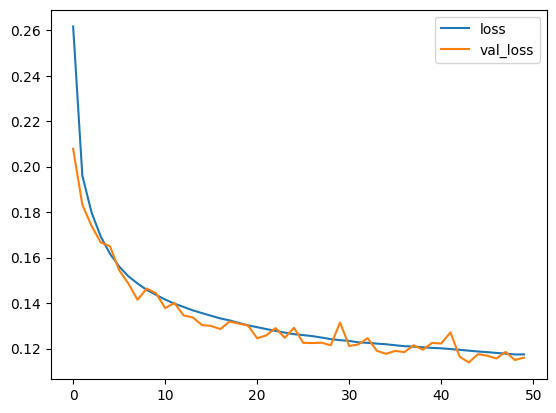

In [40]:
loss_df.plot()

In [41]:
ypred=ann.predict(xtest)
ypred[:5]

6914/6914 [==============================] - 12s 2ms/step


array([[3.1311202],
       [0.9932589],
       [3.3628662],
       [2.1179051],
       [2.7626514]], dtype=float32)

In [42]:
predict=pd.DataFrame({'Actual_Value':ytest,'Pred_Value':ypred.flatten()})
predict.head()

,Actual_Value,Pred_Value
0,2.610000,3.131120
1,1.117835,0.993259
2,4.290000,3.362866
3,2.070000,2.117905
4,1.620000,2.762651


<Axes: >

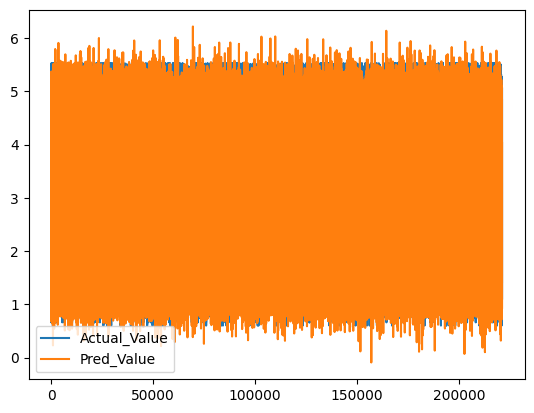

In [43]:
predict.plot()

In [44]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.9065703224278926